In [1]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
close("all")
fig, ax = subplots(figsize=(8,2))
x = arange(128, dtype=uint8)
y = arange(32, dtype=uint8)
xx, yy = meshgrid( x, y )
buff = zeros((xx.shape[0], xx.shape[1], 3), dtype=uint8)
frm = 0
img = ax.imshow(buff)

# Noisy Interference effect

In [27]:
frm = 500
i = randint(1,8)
j = randint(1,8)
print(i,j)

5 1


In [28]:
temp1 = abs((( i*yy+(frm*16)//(xx+16))%64)-32)*7
temp2 = abs((( j*xx+(frm*16)//(yy+16))%64)-32)*7
buff[:,:,0] = temp1 & ((i<<5)-1)
buff[:,:,1] = temp2 & ((j<<5)-1)
buff[:,:,2] = (temp1^temp2)&(0x88)
frm += 1
img.set_data( buff )

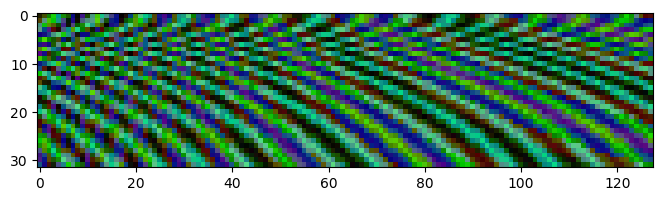

In [39]:
fig

# XOR effect

In [38]:
# setPixel( 0, x, y, ((x+y+frm)&aniZoom)*boost, ((x-y-frm)&aniZoom)*boost, ((x^y)&aniZoom)*boost, 0 );
frm = 0
zoom = 32
boost = 4

In [39]:
zoom = randint(1, 2**16)
boost = randint(1, 8)
print( zoom, boost)

50029 3


In [43]:
buff[:,:,0] = ((xx+yy+frm)&zoom)*boost
buff[:,:,1] = ((xx-yy-frm)&zoom)*boost
buff[:,:,2] = ((xx^yy)&zoom)*boost
frm += 1
img.set_data( buff )

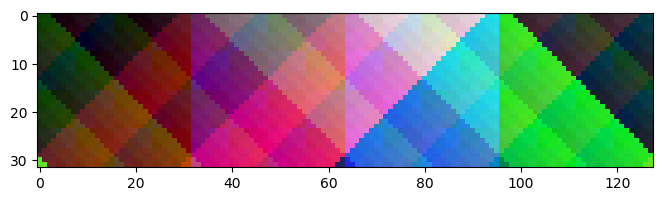

In [44]:
fig

# alien flame

In [57]:
buff[:] = 0

In [70]:
# if sum(buff)<50000:
buff[31,randint(0,128,1),0] += 1
buff[31,randint(0,128,1),0] //= 2
for y in range(30, -1, -1):
    for x in range(128):
        temp = int( sum( buff[y+1,x-1:x+2,randint(0,3,1)] ) ) // 2
        buff[y,x,randint(0,3,1)] = temp & 0xFF
        #buff[y,x,1] = sum( buff[y+1,x-1:x+3,0] ) // 3
        #buff[y,x,2] = sum( buff[y+1,x-1:x+2,0] ) // 2
frm += 1
img.set_data( buff )

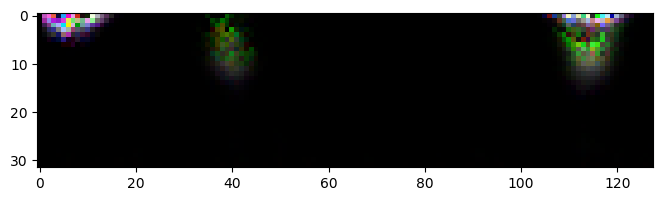

In [6798]:
fig

# Doom fire

## Generate plaettes

In [171]:
P_SIZE = 32
cm = get_cmap("gist_ncar")(linspace(0, 1, P_SIZE)) * 255
palette = cm[:,:3].astype(uint8)

In [172]:
for i, c in enumerate(palette):
    if (i % 4) == 0:
        print()
    print("0x{:02x}{:02x}{:02x}{:02x}, ".format(0xFF, c[2], c[1], c[0]), end="")


0xff800000, 0xff343a00, 0xff374a00, 0xffbc1400, 
0xffff5400, 0xffffc000, 0xffffe400, 0xffdefe00, 
0xffa3fa00, 0xff53fc00, 0xff00fb13, 0xff00dd46, 
0xff00de6d, 0xff03f87d, 0xff23ff9f, 0xff33ffc3, 
0xff0fffec, 0xff00edff, 0xff00daff, 0xff08c6ff, 
0xff0a99ff, 0xff0257ff, 0xff002aff, 0xff1104ff, 
0xffb100ff, 0xffff0de3, 0xffff29ac, 0xfff656c2, 
0xffef88ec, 0xfff4adf2, 0xfff9d2f8, 0xfffef7fe, 

In [22]:
def displ():
    for x in range(W):
        for y in range(0, H):
            buff[y, x, :] = palette[pbuff[x + y * W]]
    img.set_data(buff)
    gcf().canvas.draw_idle()
    
def seedRow():
    c = randint(1, 11)
    v = 0
    for x in range(W):
        if c <= 0:
            c = randint(1, 11)
            v = c * 3
        pbuff[x + H * W] = v
        c -= 1

def spreadFire(ind):
    pixel = pbuff[ind]
    if pixel == 0:
        pbuff[ind - W] = 0
    else:
        r = randint(0, 3)
        tmp = pixel - r
        if tmp < 0:
            tmp = 0
        if tmp >= P_SIZE:
            tmp = P_SIZE - 1
        pbuff[ind - W - (r & 1)] = tmp        

In [14]:
pbuff = zeros(128*33, dtype=uint8)
W = 128
H = 32
frm = 0
seedRow()
displ()

In [176]:
if frm % 10 == 0:
    seedRow()
        
for y in range(H, 0, -1):
    for x in range(W):
        spreadFire(x + y * W)

frm += 1
displ()

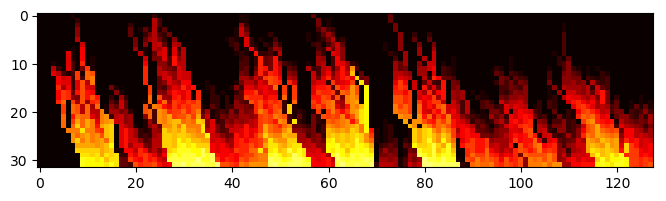

In [1352]:
gcf()

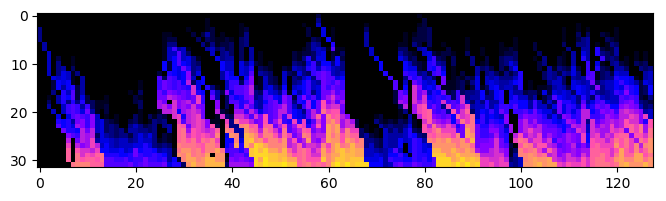

In [1338]:
gcf()